### Questão 4:

A engenheira Fiona, responsável pela operação da Unidade de Extração por Solvente (UES) de uma indústria química, recebeu a incumbência de encontrar condições operacionais que fossem lucrativas para a UES para evitar o seu desligamento. A avaliação econômica realizada pela Eng. Fiona resultou na seguinte função lucro:

$$
L(x) = a - \frac{b}{x_1} - c \cdot x_2 - d \cdot \frac{x_1}{x_2}
$$

em que $x_1$ e $x_2$ são as razões mássicas do produto que deixam cada estágio de extração na corrente refinada, com $x_1 \leq 0,02$ e $x_2 \leq x_1$, e $a = 129,93$, $b = 0,5$, $c = 4000$, e $d = 25$ são constantes. A condição de operação atual é dada por $x_1 = 0,015$ e $x_2 = 0,001$.

**(a)** Qual é o valor da função lucro na condição atual?

**(b)** Qual a condição de máximo lucro encontrada pela Eng. Fiona e o valor da função lucro nessa nova condição, sabendo que a solução foi irrestrita?

**(c)** Mostre que a nova condição é realmente um ponto de máximo;

**(d)** Após operar vários meses nessa nova condição, a falta de solvente no mercado aumentou em quatro vezes o seu preço, modificando as constantes da função lucro para $a = 279,72$, $b = 2,0$, $c = 4000$, e $d = 100$. Se a planta continuasse a operar nas mesmas condições encontradas em (b), qual seria o valor da função lucro? Qual foi a decisão tomada pela Eng. Fiona nessa nova condição do mercado? Por quê?

In [1]:
from sympy import symbols, solve, diff, hessian, Matrix
from pprint import pprint

In [2]:
# Parameters
a = 129.93
b = 0.5
c = 4000
d = 25

# Initial operating conditions
x1_0 = 0.015
x2_0 = 0.001

# Objective function
L0 = a - (b / x1_0) - (c * x2_0) - (d * (x1_0 / x2_0))
L0

-282.4033333333333

In [3]:
x1, x2 = symbols('x1 x2')

# Define the objective function
L = a - (b / x1) - (c * x2) - (d * (x1 / x2))

# Compute the partial derivatives
dL_dx1 = diff(L, x1)
dL_dx2 = diff(L, x2)

# Solve the system of equations
solutions = solve((dL_dx1, dL_dx2), (x1, x2))
solutions

[(0.0135720880829745, 0.00921007874660097),
 (-0.00678604404148727 - 0.011753773062256*I,
  -0.00460503937330048 + 0.00797616216541158*I),
 (-0.00678604404148727 + 0.011753773062256*I,
  -0.00460503937330048 - 0.00797616216541158*I)]

In [4]:
print('ponto de primeira derivada = 0: ', solutions[0][0], solutions[0][1])

ponto de primeira derivada = 0:  0.0135720880829745 0.00921007874660097


In [5]:
# Hessian matrix to check for maximum
H = hessian(L, (x1, x2))

# Evaluate Hessian at the solution to verify if it is a maximum
H_evaluated = H.subs({x1: solutions[0][0], x2: solutions[0][1]})
eigenvalues = H_evaluated.eigenvals()
eigenvalues

{-257795.133578412: 1, -1010818.50373196: 1}

Os autovalores da Hessiana no ponto de derivada zero são ambos negativos o que caracteriza o ponto de máximo.

Também percebe-se que a solução não viola as restrições, portanto é uma solução utilizável e o lucro calculado com esse ponto fica positivo.

In [6]:
# Calculate the maximum profit at the optimal values
L_max_symbolic = L.subs({x1: solutions[0][0], x2: solutions[0][1]})
L_max_symbolic

19.4090550407884

Avaliando a função lucro nas novas condições de preços

In [7]:
# Parameters
a = 279.72
b = 2.0
c = 4000
d = 100

# Operating conditions
x1_0 = solutions[0][0]
x2_0 = solutions[0][1]

# Objective function
L0 = a - (b / x1_0) - (c * x2_0) - (d * (x1_0 / x2_0))
L0

-51.8428348776348

Com as novas condição de preços, percebe-se que o lucro fica negativo no ponto de operação.

Portanto, resolve-se novamente o problema para as novas condições.

In [11]:
x1, x2 = symbols('x1 x2')

# Define the objective function
L = a - (b / x1) - (c * x2) - (d * (x1 / x2))

# Compute the partial derivatives
dL_dx1 = diff(L, x1)
dL_dx2 = diff(L, x2)

# Solve the system of equations
solutions = solve((dL_dx1, dL_dx2), (x1, x2))
solutions

[(0.0215443469003188, 0.0232079441680639),
 (-0.0107721734501594 - 0.0186579517236206*I,
  -0.0116039720840319 + 0.0200986692191542*I),
 (-0.0107721734501594 + 0.0186579517236206*I,
  -0.0116039720840319 - 0.0200986692191542*I)]

Percebe-se que para a nova função objetivo o ponto de derivada zero viola as restrições.

Pode-se realizar uma otimização com restrições e avaliar se com essa nova função objetivo é possível conseguir um lucro positivo.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the new objective function
def objective(x):
    x1, x2 = x
    a = 279.72
    b = 2.0
    c = 4000
    d = 100
    return -(a - (b / x1) - (c * x2) - (d * (x1 / x2)))

# Define the constraints
constraints = (
    {'type': 'ineq', 'fun': lambda x: 0.02 - x[0]},  # x1 <= 0.02
    {'type': 'ineq', 'fun': lambda x: x[0] - x[1]}   # x2 <= x1
)

# Set bounds for the variables (to ensure they are positive)
bounds = [(1e-6, 0.02), (1e-6, 0.02)]

# Initial guess for the optimizer
x0 = [0.015, 0.001]

# Solve the optimization problem
result = minimize(objective,
                  x0,
                  method='trust-constr',
                  bounds=bounds,
                  constraints=constraints)

print('Ponto Ótimo com restrições: ', result.x)
print('Resultado da função objetivo Lucro: ', -result.fun)

Ponto Ótimo com restrições:  [0.0199979  0.01999636]
Resultado da função objetivo Lucro:  -0.2836467757469592


Infelizmente, com a nova função objetivo e as restrições, o máximo lucro ainda fica negativo, indicando prejuízo e a planta deve ser desligada.

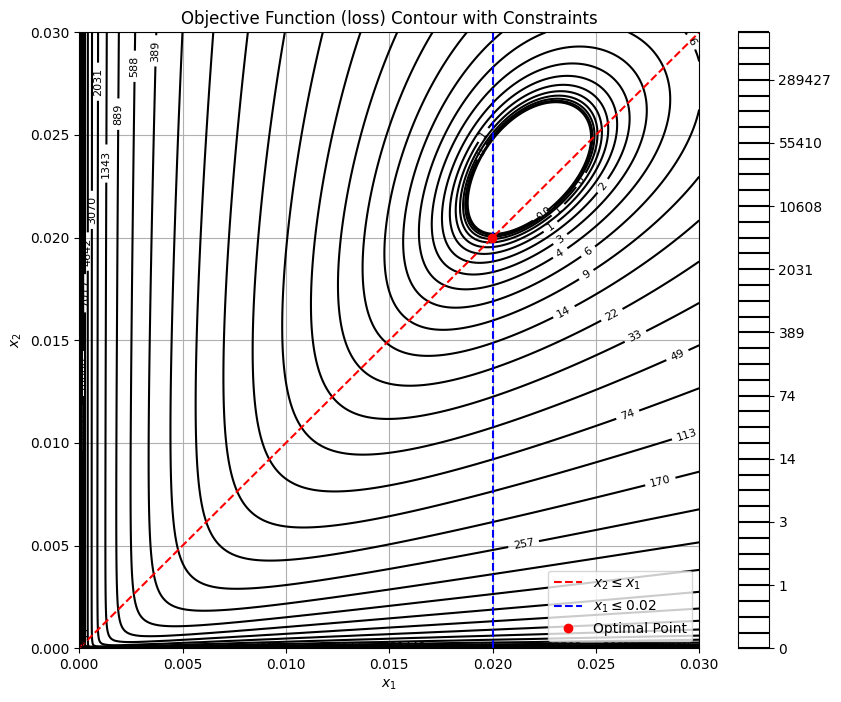

In [17]:
# Define the objective function for the contour plot
def objective_contour(x1, x2):
    a = 279.72
    b = 2.0
    c = 4000
    d = 100
    return -(a - (b / x1) - (c * x2) - (d * (x1 / x2)))

# Create a grid of values for x1 and x2
x1_vals = np.linspace(1e-6, 0.03, 400)
x2_vals = np.linspace(1e-6, 0.03, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = objective_contour(X1, X2)

# Create the contour plot with a single color and display the values on the contour lines
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, Z, levels=np.logspace(-1, 6, 40), colors='black')
plt.colorbar(contour)
plt.clabel(contour, inline=True, fontsize=8)  # Show values on the contour lines

# Plot the constraints
plt.plot(x1_vals, x1_vals, 'r--', label=r'$x_2 \leq x_1$')  # x2 <= x1
plt.plot([0.02, 0.02], [0, 0.03], 'b--', label=r'$x_1 \leq 0.02$')  # x1 <= 0.02

# Mark the optimal point found
plt.plot(result.x[0], result.x[1], 'ro', label='Optimal Point')

# Additional plot settings
plt.xlim([0, 0.03])
plt.ylim([0, 0.03])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Objective Function (loss) Contour with Constraints')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()